1. Mencoba menerapkan teknik-teknik ensemble learning (voting, stacking, bagging/pasting, random forest regressor)
2. (Bonus) hyperparamter tuning terhadap parameter miliki baggingregressor atau random forest regressor
3. (Bonus) membandingkan performa antara ensemble learner dengan stand-alone model


In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

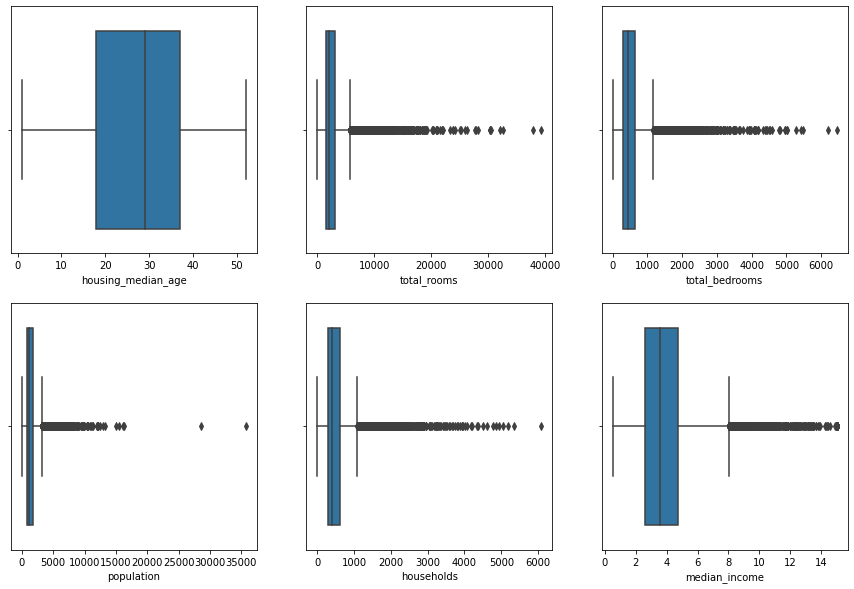

In [6]:
# explore numerical columns before spliting
num_cols = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

fig, ax = plt.subplots(2,3, figsize=(15,10))
for ix, col in enumerate(num_cols):
    sns.boxplot(x=col,data=housing, ax=ax.flatten()[ix])

In [7]:
from sklearn.model_selection import train_test_split

X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=50)

In [8]:
housing_train = pd.concat([X_train, y_train], axis=1)
housing_test = pd.concat([X_test, y_test], axis=1)

In [9]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15723,-122.44,37.78,37.0,1235.0,314.0,481.0,297.0,3.6875,NEAR BAY,492300.0
3969,-118.58,34.20,35.0,1323.0,228.0,756.0,216.0,4.2330,<1H OCEAN,221300.0
1970,-120.62,38.71,10.0,6305.0,1150.0,2597.0,921.0,4.0197,INLAND,132200.0
10139,-117.89,33.92,8.0,2120.0,544.0,1281.0,470.0,3.4954,<1H OCEAN,159500.0
17073,-122.19,37.48,35.0,7067.0,1646.0,5380.0,1597.0,4.1776,NEAR BAY,265300.0


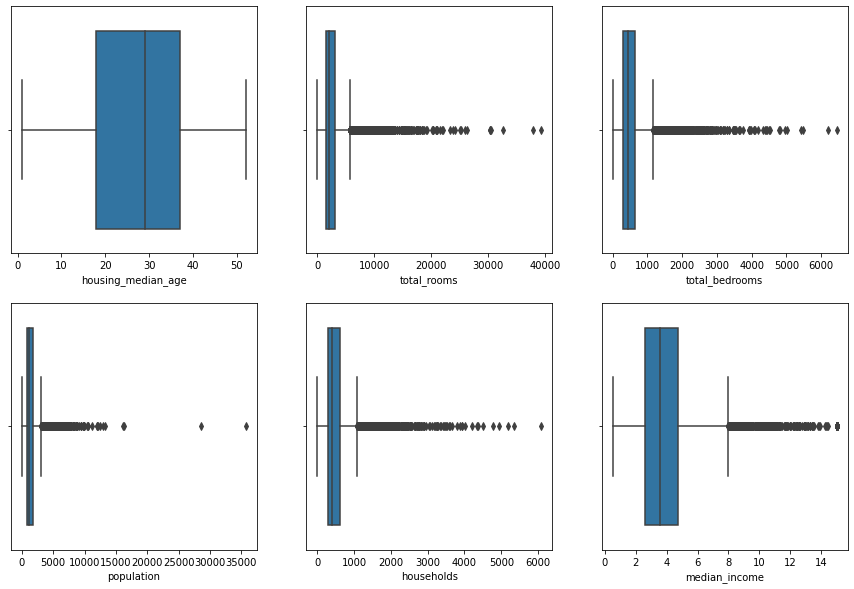

In [10]:
# explore numerical columns after spliting

num_cols = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

fig, ax = plt.subplots(2,3, figsize=(15,10))
for ix, col in enumerate(num_cols):
    sns.boxplot(x=col,data=housing_train, ax=ax.flatten()[ix])

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

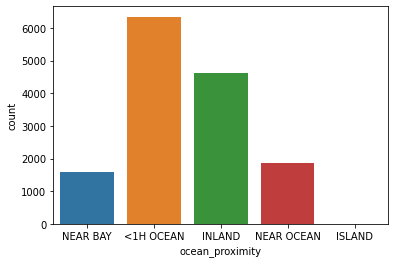

In [11]:
sns.countplot(housing_train['ocean_proximity'])

In [12]:
housing_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        142
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [13]:
housing['total_bedrooms'].isna().sum()

207

In [14]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [15]:
used_ctg_cols = ['ocean_proximity']
imputed_cols = ['total_bedrooms']
used_num_cols = ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

imputed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

full_pipeline = ColumnTransformer([
    ('imputed_pipeline', imputed_pipeline, used_num_cols),
    #('scaler', RobustScaler(), used_num_cols),
    ('onehot_encoder', OneHotEncoder(), used_ctg_cols)
],remainder='drop')

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

In [16]:
X_train.shape

(14448, 9)

In [17]:
X_train_prepared.shape

(14448, 11)

## stand alone model

In [18]:
# Modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

### LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

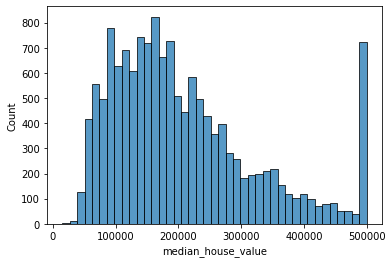

In [20]:
sns.histplot(y_train)

In [21]:
y_pred_train = lin_reg.predict(X_train_prepared)
print('Performance on training set')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set
MSE :  4856586960.055155
MAE :  50376.70905585632
MAPE :  0.2855827500559272


In [22]:
y_pred = lin_reg.predict(X_val_prepared)
print('Performance on validation set')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validation set
MSE :  4758092830.473637
MAE :  50352.91717302797
MAPE :  0.2843482694993184


### Ridge

In [23]:
ridge = Ridge()
ridge.fit(X_train_prepared, y_train)

Ridge()

In [24]:
y_pred_train = ridge.predict(X_train_prepared)
print('Performance on training set')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set
MSE :  4856937617.040496
MAE :  50382.163552992046
MAPE :  0.2856280470333479


In [25]:
y_pred = ridge.predict(X_val_prepared)
print('Performance on validation set')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validation set
MSE :  4761187456.225952
MAE :  50368.519879830834
MAPE :  0.28441869483409715


### DT Regressor

In [26]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor()

In [27]:
y_pred_train = dt_reg.predict(X_train_prepared)
print('Performance on training set')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set
MSE :  0.0
MAE :  0.0
MAPE :  0.0
MSLE :  0.0


In [28]:
y_pred = dt_reg.predict(X_val_prepared)
print('Performance on validation set')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validation set
MSE :  7181029616.392118
MAE :  58977.05103359173
MAPE :  0.32684089664191923
MSLE :  0.0


## Predict with Ensemble Learning

### voting

In [29]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(
    estimators=[
        ('lin_reg', LinearRegression()),
        ('ridge', Ridge()),
        ('dt_reg', DecisionTreeRegressor())
    ]
)

voting.fit(X_train_prepared, y_train)

VotingRegressor(estimators=[('lin_reg', LinearRegression()), ('ridge', Ridge()),
                            ('dt_reg', DecisionTreeRegressor())])

In [30]:
y_pred_train = voting.predict(X_train_prepared)
print('Performance on training set with voting ensemble')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set with voting ensemble
MSE :  2158522055.2451067
MAE :  33586.29001824252
MAPE :  0.19040359037114393


In [31]:
y_pred = voting.predict(X_val_prepared)
print('Performance on validation set with voting ensemble')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validation set with voting ensemble
MSE :  4488846662.5078745
MAE :  48454.2412990619
MAPE :  0.2707178683569949


### stacking

In [32]:
? StackingRegressor

Object ` StackingRegressor` not found.


In [33]:
from sklearn.ensemble import StackingRegressor

stacking = StackingRegressor(
    estimators=[
        ('lin_reg', LinearRegression()),
        ('ridge', Ridge()),
        ('dt_reg', DecisionTreeRegressor())
    ]
)

stacking.fit(X_train_prepared, y_train)

StackingRegressor(estimators=[('lin_reg', LinearRegression()),
                              ('ridge', Ridge()),
                              ('dt_reg', DecisionTreeRegressor())])

In [34]:
y_pred_train = stacking.predict(X_train_prepared)
print('Performance on training set with voting ensemble')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set with voting ensemble
MSE :  2465570144.3754225
MAE :  35754.79246494518
MAPE :  0.20092837571842528


In [35]:
y_pred = stacking.predict(X_val_prepared)
print('Performance on validation set with voting ensemble')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
#print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validation set with voting ensemble
MSE :  4473379078.569487
MAE :  48445.136688315964
MAPE :  0.2688294143437799


### Bagging/Pasting

In [36]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        n_estimators=5,
        random_state=22
    )

bagging.fit(X_train_prepared, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=5,
                 random_state=22)

In [37]:
y_pred_train = bagging.predict(X_train_prepared)
print('Performance on training set with voting ensemble')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set with voting ensemble
MSE :  938957854.3515698
MAE :  19053.061863233666
MAPE :  0.1081659477260323
MSLE :  0.024954660441212473


In [38]:
y_pred = bagging.predict(X_val_prepared)
print('Performance on validition set with voting ensemble')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validition set with voting ensemble
MSE :  4514076184.411783
MAE :  47467.258656330756
MAPE :  0.26828222754743924
MSLE :  0.024954660441212473


### RandomForest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=22)
rf_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(n_estimators=5, random_state=22)

In [40]:
y_pred_train = rf_reg.predict(X_train_prepared)
print('Performance on training set with voting ensemble')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set with voting ensemble
MSE :  932594228.6889397
MAE :  19014.71360741971
MAPE :  0.10767862848186573
MSLE :  0.02468484101024713


In [41]:
y_pred = rf_reg.predict(X_val_prepared)
print('Performance on validition set with voting ensemble')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validition set with voting ensemble
MSE :  4548762934.6446905
MAE :  47606.373966408275
MAPE :  0.2689944834989248
MSLE :  0.02468484101024713


## Hyperparameter tuning with Grid Search/Random Search CV

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param = {
    'base_estimator' : [lin_reg, ridge, dt_reg],
    'n_estimators' : [10, 20, 30],
    'bootstrap' : [True, False]
}

In [43]:
grid_search = GridSearchCV(bagging, param, cv=10)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        n_estimators=5, random_state=22),
             param_grid={'base_estimator': [LinearRegression(), Ridge(),
                                            DecisionTreeRegressor()],
                         'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30]})

In [44]:
grid_search.best_estimator_

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=30,
                 random_state=22)

In [45]:
bagging_tuned = grid_search.best_estimator_.fit(X_train_prepared, y_train)

In [46]:
y_pred_train = bagging_tuned.predict(X_train_prepared)
print('Performance on training set with voting ensemble (hyperparameter)')
print('MSE : ',mean_squared_error(y_train,y_pred_train))
print('MAE : ',mean_absolute_error(y_train,y_pred_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_train))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on training set with voting ensemble (hyperparameter)
MSE :  574832924.2954419
MAE :  16455.206215393137
MAPE :  0.09447667330559649
MSLE :  0.016668708624920647


In [47]:
y_pred = bagging_tuned.predict(X_val_prepared)
print('Performance on validition set with voting ensemble (hyperparameter)')
print('MSE : ',mean_squared_error(y_val,y_pred))
print('MAE : ',mean_absolute_error(y_val,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_val,y_pred))
print('MSLE : ',mean_squared_log_error(y_train,y_pred_train))

Performance on validition set with voting ensemble (hyperparameter)
MSE :  3873397931.000646
MAE :  43783.562316968135
MAPE :  0.24768807405296334
MSLE :  0.016668708624920647
